In [1]:
import numpy as np

a = np.zeros(12)
a[0]=1
a[2]=2
a[3]=2
a[4]=1
a[7]=1
a[8]=2
a[10]=2
a[11]=1

b = np.zeros(12)
b[0]=2
b[2]=4
b[3]=6
b[4]=3
b[7]=2
b[8]=6
b[10]=4
b[11]=7

spin = [1, 1, -1, -1, 1, -1, 1, -1]


In [2]:
# Build s(p)

def build_sp(a,b):
    dim = len(a)
    s_p = np.zeros(dim)
    for i in range(dim):
        if a[i] == 0:
            s_p[i] = 0
        else:
            s_p[i] = 2*b[i] + a[i] - 1
    return s_p

s_p = build_sp(a,b)
s_p

array([ 4.,  0.,  9., 13.,  6.,  0.,  0.,  4., 13.,  0.,  9., 14.])

In [3]:
def build_vertex_list(a,b,sp,Nsites,L):
    xv = -1*np.ones(L*4,np.int16)
    v_first = -1*np.ones(Nsites,np.int16)
    v_last = -1*np.ones(Nsites,np.int16)
    for i in range(L):
        if sp[L-1-i] == 0:
            continue
        v0 = 4*i 
        bnd = int(sp[L-1-i]/2)
        s1 = bnd
        s2 = (bnd+1)%Nsites
        v1 = v_last[s1]
        v2 = v_last[s2]

        if v1 != -1:
            xv[v1] = v0
            xv[v0] = v1     
        else:
            v_first[s1] = v0
        if v2 != -1:
            xv[v2] = v0+1
            xv[v0+1] = v2              
        else:
            v_first[s2] = v0+1
        v_last[s1] = v0+2
        v_last[s2] = v0+3
        
    for i in range(Nsites):
        f = v_first[i]
        if f != -1:
            l = v_last[i]
            xv[f] = l
            xv[l] = f

    return v_first,v_last,xv

In [4]:
def display_vertex_list(xv,M):
    print("l = \t  ")
    for i in range(4):
        print("\t",i,"\t\t  ",end="")
    print("\n")
    for i in range(1,M+1):
        for j in range(4):
            print("\t [",4*(i-1) + j,"]",xv[4*(i-1) + j],"\t",end = "")
        print("\n")

In [5]:
vf,vl,XV = build_vertex_list(a,b,s_p,8,12)
display_vertex_list(XV,12)

l = 	  
	 0 		  	 1 		  	 2 		  	 3 		  

	 [ 0 ] 35 		 [ 1 ] 3 		 [ 2 ] 13 		 [ 3 ] 1 	

	 [ 4 ] 38 		 [ 5 ] 39 		 [ 6 ] 29 		 [ 7 ] 37 	

	 [ 8 ] -1 		 [ 9 ] -1 		 [ 10 ] -1 		 [ 11 ] -1 	

	 [ 12 ] 34 		 [ 13 ] 2 		 [ 14 ] 32 		 [ 15 ] 33 	

	 [ 16 ] 46 		 [ 17 ] 47 		 [ 18 ] 44 		 [ 19 ] 28 	

	 [ 20 ] -1 		 [ 21 ] -1 		 [ 22 ] -1 		 [ 23 ] -1 	

	 [ 24 ] -1 		 [ 25 ] -1 		 [ 26 ] -1 		 [ 27 ] -1 	

	 [ 28 ] 19 		 [ 29 ] 6 		 [ 30 ] 45 		 [ 31 ] 36 	

	 [ 32 ] 14 		 [ 33 ] 15 		 [ 34 ] 12 		 [ 35 ] 0 	

	 [ 36 ] 31 		 [ 37 ] 7 		 [ 38 ] 4 		 [ 39 ] 5 	

	 [ 40 ] -1 		 [ 41 ] -1 		 [ 42 ] -1 		 [ 43 ] -1 	

	 [ 44 ] 18 		 [ 45 ] 30 		 [ 46 ] 16 		 [ 47 ] 17 	



In [6]:
# Diagonal Update

import random 

# Diagonal update addition probability  
def prob_add(L,Nb,beta,n):
    return min((beta*Nb)/(2*(L-n)),1)

# Diagonal update removal probability
def prob_remove(L,Nb,beta,n):
    return min((2*(L-n+1))/(beta*Nb),1)

def diag_update(L,Nb,beta,n,spin,a,b):
    sp = np.zeros(10*L,np.int8)
    for p in range(0,L):
        bnd = random.randint(1,Nb)
        # Adjacent spins in the bond labelled by the number bnd
        spin_i = spin[bnd-1]
        spin_j = spin[bnd]
        if a[p] == 0:
            if spin_i == spin_j:
                continue
            # Metropolis update
            if random.random() < prob_add(L,Nb,beta,n):
                # accept the operator on the bond 
                b[p] = bnd
                a[p] = 1
                sp[p] = 2*b[p]
                n += 1
        elif a[p] == 1:
            # Metropolis update
            if random.random() < prob_remove(L,Nb,beta,n):
                # remove the operator on the bond
                b[p] = 0
                a[p] = 0
                sp[p] = 0
                n -= 1
        else:
            # Switch the spins
            spin[bnd-1] *= -1
            spin[bnd] *= -1
    return sp,n

In [7]:
M = 12
Nsites = 8
A = np.zeros(M)
B = np.zeros(M)
n = 0
spins = [(random.randint(1,Nsites)-0.5)/abs(random.randint(1,Nsites)-0.5) for i in range(Nsites)]

In [8]:
diag_update(M,Nsites-1,100,n,spins,A,B)

(array([ 6,  4,  2,  6, 14,  6, 10,  2,  4,  2,  4, 14,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0], dtype=int8),
 12)

In [9]:
A,B

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([3., 2., 1., 3., 7., 3., 5., 1., 2., 1., 2., 7.]))

In [10]:
def flip_bit(number, i):
    mask = 1 << i  # Create a mask with the i-th bit set to 1
    flipped_number = number ^ mask  # XOR the number with the mask to flip the i-th bit
    return flipped_number

In [11]:
def traverse_loop(v0,xv,flip,sp):
    v = v0
    while True:
        if flip:
            xv[v] = -2
            p = int(v/4)
            sp[p] = flip_bit(sp[p],0)
        else:
            xv[v] = -1
        v_prime = flip_bit(v,0)
        v = xv[v_prime]
        if flip:
            xv[v_prime] = -2
        else:
            xv[v_prime] = -1
        if v == v0:
            break

In [12]:
def loop_update(L,xv,a,sp,vfirst,Nsites,spins):
    for v0 in range(0,4*L,2):
        if xv[v0] < 0:
            continue
        if random.uniform(0,1) < 1/2:
            flip = False
            traverse_loop(v0,xv,flip,sp)
        else:
            flip = True
            traverse_loop(v0,xv,flip,sp)
    for i in range(Nsites):
        v = vfirst[i]
        if v == -1:
            if random.uniform(0,1) < 1/2:
                spins[i] *= -1
        else:
            v += 1
            if xv[v] == -2:
                spins[i] *= -1
    for i in range(len(sp)):
        if sp[i] > 0:
            a[i] = (sp[i]%2)+1

In [13]:
def generate_bonds(Nx,Ny):
    dim = Nx*Ny
    bonds = np.zeros([2,2*dim],np.int8)
    for i in range(Ny):
        for j in range(Nx):
            s = j+i*Nx
            x = (j+1)%Nx 
            y = i
            s_p = x+y*Nx
            bonds[0,s] = s
            bonds[1,s] = s_p
            x = j
            y = (i+1)%Ny
            s_p = x+y*Nx
            bonds[0,s+dim] = s
            bonds[1,s+dim] = s_p
    return bonds   

In [14]:
generate_bonds(3,3)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 0, 4, 5, 3, 7, 8, 6, 3, 4, 5, 6, 7, 8, 0, 1, 2]], dtype=int8)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 2 1 1 1 2 0 1 2 1 2 2 2 1 1 1 1 1]
[2 1 2 2 2 0 1 2 1 2 2 2 2 2 2 1 1 1 1 1]
[2 0 2 2 2 2 1 2 1 2 2 2 2 2 2 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 0 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 1 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 2 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 2 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2

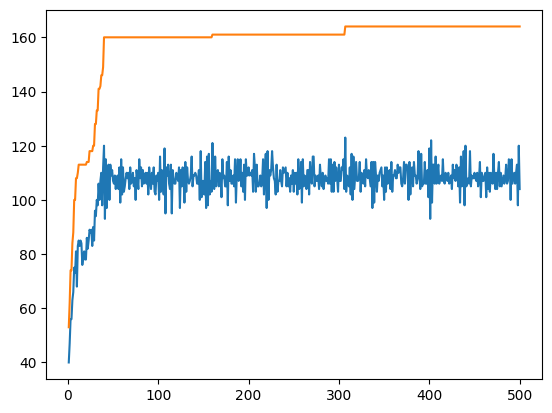

In [15]:
import matplotlib.pyplot as plt
import math
L = 40
beta = 20
alpha = 3
Nsites = 8
Nbonds = Nsites-1
sp = np.zeros(10*L,np.int8)
a = np.zeros(10*L,np.int8)
b = np.zeros(10*L,np.int8)
max_iter = 50
iter = 0
n = 0
step = 0
counter_n = []
counter_L = []
counter_iter =[]
while step < 500:
    sp,n = diag_update(L,Nbonds,beta,n,spins,a,b)
    print(a[0:20])
    
    if n <= 0:
        continue
    
    v_first,v_last,xv = build_vertex_list(a,b,sp,Nsites,L)
    loop_update(L,xv,a,sp,v_first,Nsites,spins)
    
    if L-n < n/alpha:
        L = math.trunc(n+(n/alpha))
    counter_n.append(n)
    counter_L.append(L)
    
    step += 1
    counter_iter.append(step)
    
plt.plot(counter_iter,counter_n)
plt.plot(counter_iter,counter_L)
plt.show()